# 911 Call Data 

 The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### Import Dependencies and set %matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the csv file as a dataframe

In [2]:
df = pd.read_csv("911.csv")

### Check the info() and head() the df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Top 5 zipcodes for 911 calls

In [5]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Top 5 townships (twp) for 911 calls

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Create a new column called Reason

In [7]:
df['Reasons'] = df['title'].apply(lambda title: title.split(":")[0])

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Most common Reason for a 911 call 

In [9]:
df["Reasons"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

### Countplot of 911 calls by Reason

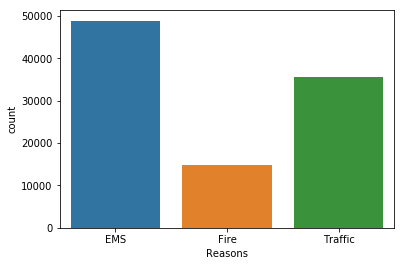

In [10]:
bars = sns.countplot(x = "Reasons", data = df)

### Time Information

In [11]:
type(df['timeStamp'][0])

str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Now that the timestamp column are  DateTime objects we can use .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda value: value.hour)
df['Month'] = df['timeStamp'].apply(lambda value: value.month)
df['Day of Week'] = df['timeStamp'].apply(lambda value: value.dayofweek)

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


### Day of Week is an integer 0-6. We can use the .map() with this dictionary to map the actual string names to the day of the week

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


### Countplot of the Day of Week / Month column with the hue based off of the Reason column

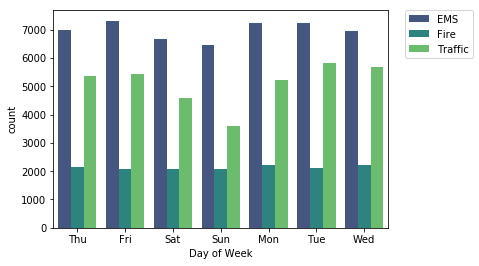

In [17]:
sns.countplot(x = 'Day of Week', hue = 'Reasons', data = df, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

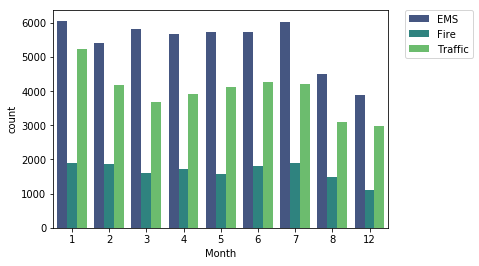

In [18]:
sns.countplot("Month", hue = 'Reasons', data = df,  palette = 'viridis' )
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

### Plot is missing  months 9,10 and 11 we can fill in this information using a simple line plot

In [19]:
byMonth = df.groupby('Month').count()

In [20]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Create a simple plot off of the dataframe indicating the count of calls per month

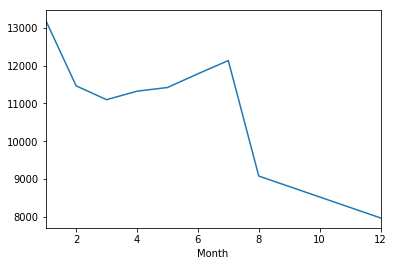

In [21]:
byMonth['lat'].plot()

### Create a linear fit on the number of calls per month

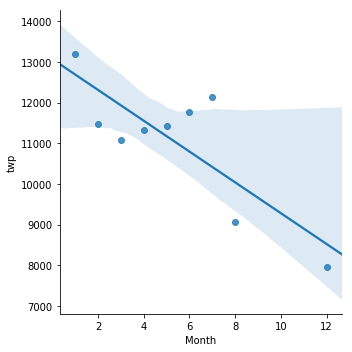

In [22]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

### Create a new column called 'Date' that contains the date from the timeStamp column

In [23]:
df["Date"] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


### Create a plot of counts of 911 calls

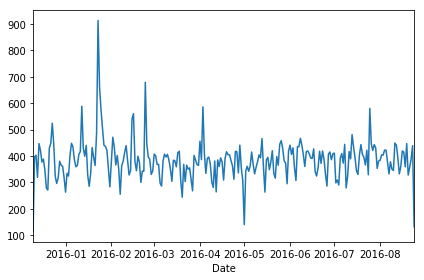

In [24]:
df.groupby("Date").count()['lat'].plot()
plt.tight_layout()

### Plots of Reasons for the 911 call

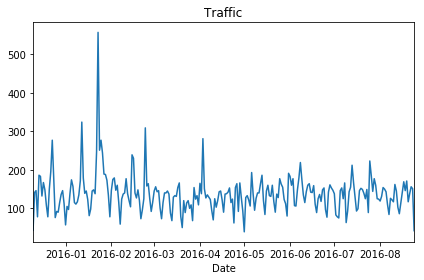

In [25]:
df[df['Reasons'] == 'Traffic'].groupby("Date").count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

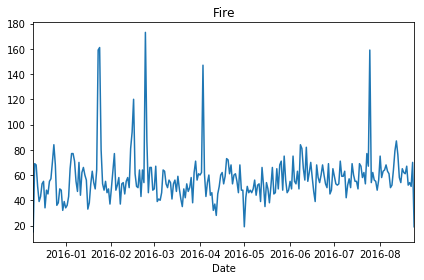

In [26]:
df[df['Reasons'] == 'Fire'].groupby("Date").count()['lat'].plot()
plt.title("Fire")
plt.tight_layout()

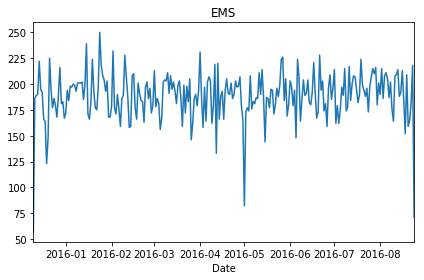

In [27]:
df[df['Reasons'] == 'EMS'].groupby("Date").count()['lat'].plot()
plt.title("EMS")
plt.tight_layout()

### Heatmaps and Clustermaps

In [28]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reasons'].unstack()

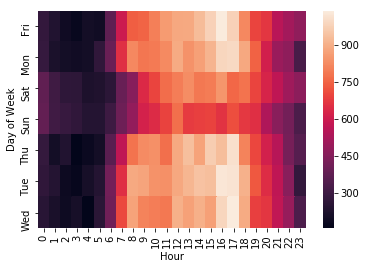

In [29]:
sns.heatmap(dayHour)

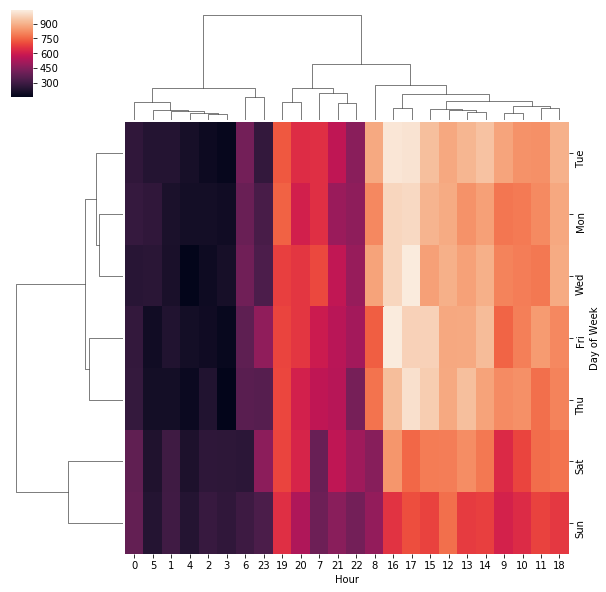

In [30]:
sns.clustermap(dayHour)

In [31]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reasons'].unstack()

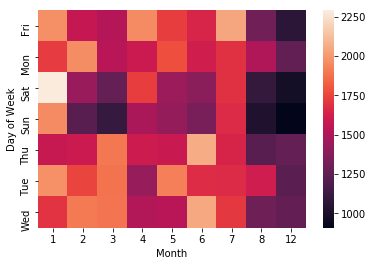

In [32]:
sns.heatmap(dayMonth)

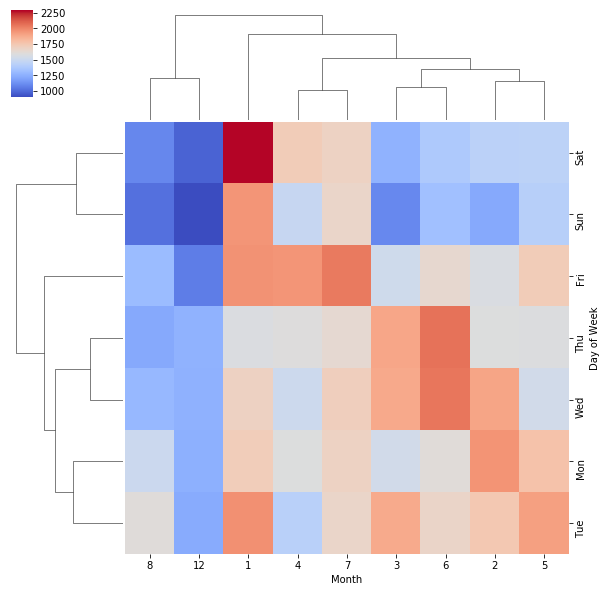

In [33]:
sns.clustermap(dayMonth,cmap = 'coolwarm')